# **2-Laboratory-15-10-2020**

| Credits to the authors of the exercises: Andrea Pasini, Giuseppe Attanasio, Flavio Giobergia <br />
| Master of Science in Data Science and Engineering, Politecnico di Torino, A.A. 2020-21

## Global Land Temperature - Data preprocessing
The Global Land Temperature (GLT) dataset is a large collection of measurements actively maintained by Berkeley Earth. It contains the raw source data measured with stations all around the globe, plus anintermediate format and several formatted output files. Data span from ∼1750 up to recent days with monthly and daily availability. 
<br />
Measurements are provided by hemispheres, states, countries, cities andmore. You can read more about the dataset at the Berkeley Earth website. For the purpose of this laboratory you will work on a modified, smaller but dirtier, version of the original GLT dataset, to stress the importance of data preprocessing. More specifically, this didactic version contains the formatted output files of the major cities of the globe with monthly granularity. For the sake of simplicity, the analysis will range between almost two centuries (i.e. between the years 1817 and 2012). The dataset is composed of∼200k rows corresponding to the measurements taken the first day of themonth in a given city. Each measurement is then described by 7 values:
- Date, when the measurement was taken
- AverageTemperature
- AverageTemperatureUncertainty
- City, from which the measurement was taken•
- Country
- Latitude
- Longitude

The main goal of this exercise is to learn how to clean a real-world dataset searching for anomalies, suchas missing values or outliers, in its data

### Questions
1. Load the Global Land Temperature dataset as a list of lists. Before starting, take a moment to better inspect the attributes you are going to work on. How many of them are nominal, how many continuous or discrete?

In [2]:
import csv

# initialize
GLT_dataset = [ [] for i in range(7)]

with open('../Datasets/GLT_filtered.csv') as f:
    
    for row in csv.reader(f): 
        for i in range(len(row)):
            GLT_dataset[i].append(row[i])
        
head = [ GLT_dataset[i].pop(0) for i in range(len(GLT_dataset))]

Let's see better what we obtained

In [3]:
print(f" *** Head  \n{head}")
print("\n *** First 5 elements for each list")

for i in range(len(GLT_dataset)):
    print(GLT_dataset[i][:8])

 *** Head  
['Date', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City', 'Country', 'Latitude', 'Longitude']

 *** First 5 elements for each list
['1849-01-01', '1849-02-01', '1849-03-01', '1849-04-01', '1849-05-01', '1849-06-01', '1849-07-01', '1849-08-01']
['26.704', '27.434', '', '26.14', '25.427', '24.844', '24.058000000000003', '23.576']
['1.435', '1.3619999999999999', '', '1.3869999999999998', '1.2', '1.402', '1.254', '1.265']
['Abidjan', 'Abidjan', 'Abidjan', 'Abidjan', 'Abidjan', 'Abidjan', 'Abidjan', 'Abidjan']
["CÃ´te D'Ivoire", "CÃ´te D'Ivoire", "CÃ´te D'Ivoire", "CÃ´te D'Ivoire", "CÃ´te D'Ivoire", "CÃ´te D'Ivoire", "CÃ´te D'Ivoire", "CÃ´te D'Ivoire"]
['5.63N', '5.63N', '5.63N', '5.63N', '5.63N', '5.63N', '5.63N', '5.63N']
['3.23W', '3.23W', '3.23W', '3.23W', '3.23W', '3.23W', '3.23W', '3.23W']


So, we're dealing with 2 nominal attributes (City,Country), three discrete ones (Date,Latitude,Longitude) and finally two continuos attributes (AverageTemperature,AverageTemperatureUncertainty) <br />

2. Analyze the attribute AverageTemperature, which contains missing values. Fill any gap with the arithmetic mean among the closest antecedent and the closest successive measurements in time,taken in the same city. Assume the following rules for edge cases:

original_list = ['', 5, 6,'']
step_1        = [ 2.5, 5, 6,''] # (0 + 5) / 2
step_2        = [ 2.5, 5, 6,  3 ] # (6 + 0) / 2

original_list   = ['','', 24, 28.9 ]
step_1          = [ 12,'', 24, 28.9 ] # (0 + 24) / 2
step_2          = [ 12, 18, 24, 28.9 ] # (12 + 24) / 2

In [4]:
# let's start with a toy vector in order to see better what happens
toy =  ['',5,4,'',3,'','']

def next_non_negative(i):
    for k in range(i+1,len(toy)):
        if toy[k] != '':
            return k
    return -1

""" 
    I define the first control outside the loop 
    because in this way this control will take place
    just once
"""
print(toy)

if toy[0] == '':
    toy[0] = toy[next_non_negative(0)]/2

print(toy)

# from second to penultimate
for i in range(1,len(toy)):
    
    if toy[i] == '':
        j = next_non_negative(i)
        
        # if there is any non-null value beyond it, it takes the previous one
        if j == -1:
            toy[i] = toy[i-1]/2
        else:
            if (j-i) > 1:
                toy[i] = toy[j]/2
            else:
                toy[i] = (toy[i-1] + toy[j])/2
    print(toy)
    

['', 5, 4, '', 3, '', '']
[2.5, 5, 4, '', 3, '', '']
[2.5, 5, 4, '', 3, '', '']
[2.5, 5, 4, '', 3, '', '']
[2.5, 5, 4, 3.5, 3, '', '']
[2.5, 5, 4, 3.5, 3, '', '']
[2.5, 5, 4, 3.5, 3, 1.5, '']
[2.5, 5, 4, 3.5, 3, 1.5, 0.75]


It'd works, now let's try it on our list, but firstly we need to map these values as float, otherwise we cannot calculate the mean 


In [5]:
# convert from string to float
GLT_dataset[1] = [float(i) if i != '' else '' for i in GLT_dataset[1] ]

def next_non_negativeV2(i):
    for k in range(i+1,len(GLT_dataset[1])):
        if GLT_dataset[1][k] != '':
            return k
    return -1

if GLT_dataset[1][0] == '':
    GLT_dataset[1][0] = GLT_dataset[1][next_non_negative(0)]/2

for i in range(len(GLT_dataset[1])):
    
    if GLT_dataset[1][i] == '':
        
        j = next_non_negativeV2(i)
        
        if j == -1:
            GLT_dataset[1][i] = GLT_dataset[1][i-1]/2
        else:
            if (j-i) > 1:
                GLT_dataset[1][i] = GLT_dataset[1][j]/2
            else:
                GLT_dataset[1][i] = (GLT_dataset[1][i-1] + GLT_dataset[1][j])/2
    
GLT_dataset[1][:10]

[26.704,
 27.434,
 26.787,
 26.14,
 25.427,
 24.844,
 24.058000000000003,
 23.576,
 24.4195,
 25.263]

In [6]:
for i,elem in enumerate(GLT_dataset[1]):
    
    if elem == '' and i != len(GLT_dataset[1])-1:
        # look for the first non-null value
        for j in range(i+1,len(GLT_dataset[1])):
            if GLT_dataset[1][j] != '':
                GLT_dataset[1][i] = GLT_dataset[1][j]/2
                break
                
    elif elem == '' and i == len(GLT_dataset[1])-1:
        # use the previous element
        GLT_dataset[1][i] = GLT_dataset[1][i-1]/2 

GLT_dataset[1][:10]

[26.704,
 27.434,
 26.787,
 26.14,
 25.427,
 24.844,
 24.058000000000003,
 23.576,
 24.4195,
 25.263]

3. Define a function that, given the name of a city and an integerN >0, prints:<br />
(a) the top N hottest measurements; <br />
(b) the top N coldest measurements.

In [26]:
def getTopTemperatures(city,N):
    # array with all the temperatures of records with the given city
    temp_city = [ GLT_dataset[1][i] for i,elem in enumerate(GLT_dataset[3]) if elem == city]
    temp_city.sort()
    
    #      coldest         hottest
    return [temp_city[:N],temp_city[:-N:-1]]

coldest, hottest = getTopTemperatures("Rome",5)

print(f"Hottest *** \n{hottest}\n")
print(f"Coldest *** \n{coldest}")

Hottest *** 
[25.951, 24.998, 24.873, 24.730999999999998]

Coldest *** 
[-1.4410000000000005, -1.3039999999999994, -1.0189999999999997, -0.871, -0.7829999999999999]


(*) 4. Let’s search for other anomalies in data distribution with the help of matplotlib. Plot the distribution of the average land temperatures for Rome and Bangkok using the aforementioned histogram plotting function

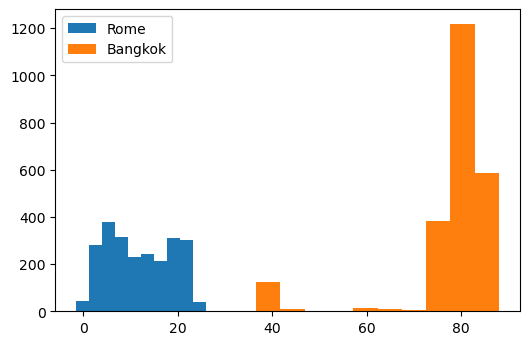

In [24]:
import matplotlib.pyplot as plt

romeTemp = [GLT_dataset[1][i] for i,element in enumerate(GLT_dataset[3]) if element == "Rome"] 
bangkokTemp = [GLT_dataset[1][i] for i,element in enumerate(GLT_dataset[3]) if element == "Bangkok"] 

plt.hist(romeTemp, label="Rome")
plt.hist(bangkokTemp, label="Bangkok")
plt.legend()

Rome varies from -1 to around 25 degrees, so it has a small variation. Then, it is in line with the average weather in the center of Italy. On the other hand, in Bangkok we see a variation from 37 to 90 degrees, and it seems quite huge. In fact I think that these values are represented in Fareneight and not in Celsius.

(*) One might think that Bangkok sensor provide temperature samples in degrees Fahrenheit while the ones located in Rome use the Celsius notation, which is the common representation in the whole dataset. Write a function to transform Fahrenheit measurements back to Celsius, apply it to your data and plot the two distribution again.

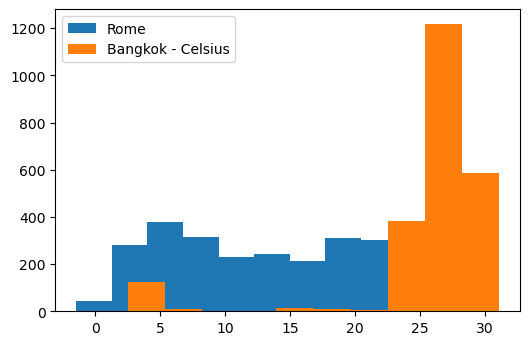

In [33]:
import matplotlib.pyplot as plt

bangkokTempCelsius = [(tempF-32)/1.8 for tempF in bangkokTemp]

plt.hist(romeTemp, label="Rome")
plt.hist(bangkokTempCelsius, label="Bangkok - Celsius")
plt.legend()

## IMDb reviews - Textual data preparation 
This exercise is meant to get you acquainted with the preprocessing of textual data. You can find useful information about Information Retrieval theory in the book "Introduction to Information Retrieval" (Manning, Raghavan, and Schütze 2008) also available at Introduction to Information Retrieval Stanford webpage. <br />

Internet Movie Database (IMDb) is a popular online platform that gathers many information related tomultimed like movies, tv shows, video games and many more. You can navigate to its website to explore the huge amount of updated content it offers. The only difference with the previously used CSV datasetsis that, in this one, the first row of the file contains a “header” (i.e. the name of each column). You should skip the first row and start reading from the second one on. <br />
IMDb has soon become a rich data source for the scientific community. Among the others, people’s reviews are one of the most important types of data that can be retrieved from the platform. The collection of reviews on a specific movie, for example, contains intrinsic information about its approval rating. Therefore, a considerable amount of recent science works has addressed the identification of the sentimentwithin textual reviews and surveys. In the context of movie reviews, the sentiment analysis would seek todiscover if the reviewer liked the movie or not based on the content of the text, with the sentiment being represented as numerical value (e.g. a score between 1 and 10) or a binary one (e.gPositiveorNegative). Wikipedia provides a general overview on the topic of sentiment analysis.During this laboratory you will work on the dataset collected and used by Maas et al. 2011. We will focus on a smaller portion of the whole dataset, known as the training data (you will learn more ontraining and test datasets). It contains 25,000 user reviews collected from IMDb for different movies.Since each review has also a numerical score between 1 and 10, the authors considered the ones witha score lower than 4 to have a negative sentiment, while the ones with a score higher than 6 to have apositive sentiment. The dataset includes12,500positive and12,500negative reviews. For the purpose ofthis laboratory, reviews, which originally came in different files, have been organized in a single CSV file.Each line of the file refers to a single review and has two fields:
1. the textual comment
2. a binary value indicating either the positive or negative sentiment, represented respectively by a ’1’and a ’0’.

### Questions
1. Load the IMDb dataset as a list of lists.

All the rows have the same structure, the comment starts and ends with a ", and it is followed by the relative number. So we can use that structure for the extraction. 

In [1]:
# Using readlines() 
IMDb_dataset = [ [], [] ]
head = ["review","label"]

with open('../Datasets/aclimdb_reviews_train.txt',encoding="utf8") as f:
    # skip 1st line (head)
    next(f)
    
    for line in f:
        """
            the rows have always the same structure
            " -- comment -- ",0/1 \n
            with [1:-3] I get just the comment, without the ""
            with [-1] I get just the last element (number)
        """
        IMDb_dataset[0].append((line.rstrip('\n')[1:-3]))
        IMDb_dataset[1].append((line.rstrip('\n')[-1]))

print(IMDb_dataset[0][:3],"\n\n",IMDb_dataset[1][:3])

['For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan ""The Skipper"" Hale jr. as a police Sgt.', "Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.", 'Bizarre horror movie filled with famous faces but stolen by Cristina Raines (later of TV\'s ""Flamingo Road"") as a pretty but somewhat unstable model with a gummy smile who is slated to pay for her attempted suicides by guarding the Gateway to Hell! The scenes with Raines modeling are very well captured, the mood music is perfect, Deborah Raffin is charming as Cristina\'s pal, but when Raines moves into a creepy Brooklyn Heights brownstone (inhabite

2. Apply the tokenization function listed below to your reviews. Please refer to the function’s docstring 1 for the input and output parameters. The tokenization procedure splits each comment in tokens (i.e.separate words).

In [2]:
import string

# written by the instructors
def tokenize(docs):
    """
        Compute the tokens for each document.
        Input: a list of strings. Each item is a document to tokenize.
        Output: a list of lists. Each item is a list containing the tokens of therelative document.
    """
    
    tokens = []
    for doc in docs:
        for punct in string.punctuation:
            doc = doc.replace(punct, " ")
        
        split_doc = [ token.lower() for token in doc.split(" ") if token ]
        tokens.append(split_doc)
    return tokens

In [3]:
tokenList = tokenize(IMDb_dataset[0])

for i in tokenList[:2]:
    print(i, end=" ")

['for', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem', 'imagine', 'a', 'movie', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny', 'maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', 'the', 'moroni', 'character', 'is', 'an', 'absolute', 'scream', 'watch', 'for', 'alan', 'the', 'skipper', 'hale', 'jr', 'as', 'a', 'police', 'sgt'] ['working', 'with', 'one', 'of', 'the', 'best', 'shakespeare', 'sources', 'this', 'film', 'manages', 'to', 'be', 'creditable', 'to', 'it', 's', 'source', 'whilst', 'still', 'appealing', 'to', 'a', 'wider', 'audience', 'br', 'br', 'branagh', 'steals', 'the', 'film', 'from', 'under', 'fishburne', 's', 'nose', 'and', 'there', 's', 'a', 'talented', 'cast', 'on', 'good', 'form'] 

3. The next step requires the computation of the term frequency (TF) of each token within its respective document. Although there exist different techniques to evaluate the frequency, we will now assumethat the TF of a tokentin a documentdis equal to the number of occurrences oftind. Computethe TF for all your reviews.

In this case we have to create a dictionary and iterate each word in each comment. If the word is already in the dictionary we need to increase its value by 1, otherwise we initialize its value to 1. 

In [4]:
# each TF will refeer to just one comment, so we need a list of dict
term_frequency = []

for comment in tokenList:
    term_frequency_dic = {}
    
    for word in comment:
        if word in term_frequency_dic:
            term_frequency_dic[word] += 1
        else:
            term_frequency_dic[word] = 1
            
    term_frequency.append(term_frequency_dic)

In [5]:
# let's try printing just few elements
term_frequency[0]

{'for': 3,
 'a': 5,
 'movie': 2,
 'that': 1,
 'gets': 1,
 'no': 1,
 'respect': 1,
 'there': 1,
 'sure': 1,
 'are': 1,
 'lot': 1,
 'of': 1,
 'memorable': 1,
 'quotes': 1,
 'listed': 1,
 'this': 1,
 'gem': 1,
 'imagine': 1,
 'where': 1,
 'joe': 1,
 'piscopo': 1,
 'is': 3,
 'actually': 1,
 'funny': 1,
 'maureen': 1,
 'stapleton': 1,
 'scene': 1,
 'stealer': 1,
 'the': 2,
 'moroni': 1,
 'character': 1,
 'an': 1,
 'absolute': 1,
 'scream': 1,
 'watch': 1,
 'alan': 1,
 'skipper': 1,
 'hale': 1,
 'jr': 1,
 'as': 1,
 'police': 1,
 'sgt': 1}

4. We will now compute the inverse document frequency(IDF). While the TF gives an idea of the weight of a token within a document, the IDF is used to find its significance among the entire collection ofdocuments (i.e. your reviews). One possible way of computing it is:

    IDF_t = log (N/DF_t)

    Where N is the number of documents and DFt is the document frequency of a token, i.e. the number of documents in whicht appears at least once. As you can see, IDFt ∈ [0,logN]. Furthermore, a low value means that the token appears in the majority of the documents, hence its presence isnot relevant to characterize any subset of them, whereas an high value indicates relevance for a fewdocuments.

    (a) Compute the DF for all of your tokens;<br />
    (b) Compute the IDF for all of your tokens;<br />
    (c) Try to sort the IDF values in ascending order. Which tokens (i.e. words) came to the top? Can you figure out why?
    
I will use the previous dictionary in order to select the tokens just once

In [6]:
import math
import operator #efficient order

document_frequency = {}
N = len(term_frequency)

for comment in term_frequency:
    for elem in comment:
        if elem in document_frequency:
            document_frequency[elem] += 1
        else:
            document_frequency[elem] = 1

inverse_document_frequency = {elem: math.log(N/document_frequency[elem]) for elem in document_frequency}
IDF_sorted = sorted(inverse_document_frequency.items(), key=operator.itemgetter(1))
IDF_sorted[:10]

[('the', 0.008314469604085238),
 ('a', 0.03355678352884277),
 ('and', 0.03401190259170586),
 ('of', 0.05226218466281087),
 ('to', 0.06293979977387414),
 ('this', 0.10136849438828884),
 ('is', 0.1086102347240488),
 ('it', 0.11559044114948828),
 ('in', 0.12606221366364628),
 ('that', 0.20722099077039452)]

The first elements are the most frequent among the document. Of course I expected this results, in fact articles, prepositions and other similar words concern a "short range" of term and they're frequently used. 

5. Compute the TF-IDF. Combine the definitions of term frequency (TF) and inverse document fre-quency (IDF), to produce a composite weight for each term in each document. The TF-IDF weighting scheme assigns to a termta weight in the documentdgiven by:

    TF-IDF_t,d  = TF_t,d * IDF_t
    
    In other words, TF-IDFt,d assigns to term t a weight in document d that is
    - high whentoccurs many times within a small number of documents;
    - low when the term occurs fewer times in a document, or occurs in many documents (thusoffering a less pronounced relevance signal);
    - lowest when the term occurs in virtually all documents.
    
  For dictionary terms that do not occur in a document, the weight is zero.The suggested output structure is a list of dictionaries. Each dictionary represents a document andcontains its tokens as key and weights as values 

In [7]:
tf_idf = []

for i,comment in enumerate(term_frequency):
    tf_idf_dic = {}
    for elem in comment:
        tf_idf_dic[elem] = term_frequency[i][elem] * inverse_document_frequency[elem]
    
    tf_idf.append(tf_idf_dic)

print(tf_idf[0])

{'for': 1.0054113848254047, 'a': 0.16778391764421385, 'movie': 0.981523185460498, 'that': 0.20722099077039452, 'gets': 2.257229391273248, 'no': 1.1142539846580666, 'respect': 3.9845936982629815, 'there': 0.8380342339083877, 'sure': 2.3538783873815965, 'are': 0.5869150448732452, 'lot': 2.0319474551515233, 'of': 0.05226218466281087, 'memorable': 3.6936910111111585, 'quotes': 5.5940316106970815, 'listed': 5.339139361068292, 'this': 0.10136849438828884, 'gem': 4.291820366787733, 'imagine': 3.5884912800826676, 'where': 1.655900786844441, 'joe': 4.137669686960474, 'piscopo': 7.418580902748128, 'is': 0.3258307041721464, 'actually': 1.982532640511814, 'funny': 2.074653024948039, 'maureen': 6.437751649736401, 'stapleton': 7.561681746388801, 'scene': 1.8767946184246356, 'stealer': 7.487573774235079, 'the': 0.016628939208170476, 'moroni': 8.740336742730447, 'character': 1.641547966352334, 'an': 0.7165386400173159, 'absolute': 4.315490110873637, 'scream': 4.706096104578052, 'watch': 1.519962906006

6. ** Sentiment analysis. Given a document, identify if it belongs to positive or negative commentscalculating the similarity between the comments in the two groups.How do we quantify the similarity between two documents exploitingT F-IDFvector representa-tion?A first attempt might consider the magnitude of the vector difference between two document vec-tors. This measure suffers from a drawback: two documents with very similar content can have a significant vector difference simply because one is much longer than the other. Thus the relative dis-tributions of terms may be identical in the two documents, but the absolute term frequencies of onemay be far larger. To compensate for the effect of document length, the standard way of quantifyingthe similarity between two documents d1 and d2 is to compute the cosine similarity of their vectorrepresentations V(d1) and V(d2)To solve this simple task of sentiment analysis you have to:
    - Take the vector representation of the first document in the collection. We will call it the test document.
    - Identify the positive and negative comments and separate them into two groups.
    - Compute the cosine similarity between the test document and all the other positive and negativecomments separately.Given that the vector representation for a document V(dn)is the dictionary of tokens with theirweights, use the following functions to compute the cosine similarity
    - assign the label (positive or negative) to the selected document analysing the mean similaritywith respect to the group of positive comments and the mean similarity with respect to thegroup of negative comments.
    - Are you able to identify the correct group? Why?
    - Repeat the previous steps with other documents. Do you think theT F-IDFpre-processing isenough to perform a simple task of sentiment analysis?

In [ ]:
def norm(d):
    """Compute the L2-norm of a vector representation."""
    return sum([ tf_idf**2 for t, tf_idf in d.items() ])**.5

def dot_product(d1, d2):
    """Compute the dot product between two vector representations."""
    word_set = set(list(d1.keys()) + list(d2.keys()))
    return sum([( d1.get(d, 0.0) * d2.get(d, 0.0)) for d in word_set ])

def cosine_similarity(d1, d2):
    """
        Compute the cosine similarity between documents d1 and d2.
        Input: two dictionaries representing the TF-IDF vectors for documentsd1 and d2.
        Output: the cosine similarity."""
    return dot_product(d1, d2) / (norm(d1) * norm(d2))

Let's proceed step by step, so the first thing to do is to take the test document and split the comment into two different lists, where we'll save just the indexes, in order to do not duplicate the data

In [42]:
test_document = IMDb_dataset[0][1]

good = []
bad = []

for i,rate in enumerate(IMDb_dataset[1]):
    if rate == '1':
        good.append(i)
    else:
        bad.append(i)
    
# with list comprehension 
#good = [i for i,rate in enumerate(test_document[1] if x[1] == 1 ]
#bad = [i for i,rate in enumerate(test_document[1] if x[1] == 0 ]

In [41]:
good_similarity = []
bad_similarity = []

for i, comment in enumerate(tf_idf[1:], start=1):
    if i in good:
        good_similarity.append()
    break

1 {'working': 3.511905503646577, 'with': 0.35867694660940547, 'one': 0.5684547366026271, 'of': 0.05226218466281087, 'the': 0.016628939208170476, 'best': 1.629844722211763, 'shakespeare': 4.911695346241352, 'sources': 6.234810805739711, 'this': 0.10136849438828884, 'film': 1.1677964693106337, 'manages': 3.8537540973041704, 'to': 0.1888193993216224, 'be': 0.5699388882584973, 'creditable': 7.824046010856292, 'it': 0.11559044114948828, 's': 0.9695547164833085, 'source': 4.853631545286591, 'whilst': 4.688551794927142, 'still': 1.7300248754232181, 'appealing': 4.765338938140912, 'a': 0.06711356705768554, 'wider': 6.175387385268911, 'audience': 2.6316448698998047, 'br': 1.0666878703931861, 'branagh': 5.6958143050070245, 'steals': 4.78909302414902, 'from': 0.7578350461821823, 'under': 2.9901478952600904, 'fishburne': 6.297989707361243, 'nose': 5.206650178022213, 'and': 0.03401190259170586, 'there': 0.8380342339083877, 'talented': 3.835061964292018, 'cast': 2.0451560637132857, 'on': 0.464323790